In [2]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)


In [23]:
import pandas as pd
df =pd.read_csv('/home/shobhit/Downloads/forestfires.csv', na_values=['NA'])
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [275]:
y = df.iloc[1:300, 9].values
y = np.where(y>40, -1, 1)

In [276]:
y

array([ 1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1, -1,  1, -1

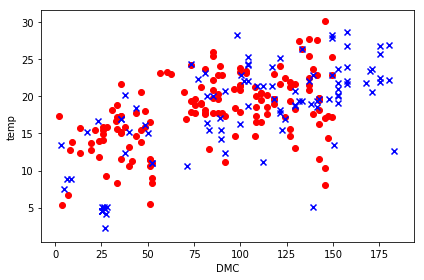

In [292]:
X = df.iloc[1:300, [5,8]].values
plt.scatter(X[1:150, 0], X[1:150, 1],
            color='red', marker='o', label='DMC')
plt.xlabel('DMC')
plt.scatter(X[200:300, 0], X[200:300, 1],
            color='blue', marker='x', label='temp')
plt.ylabel('temp')
plt.tight_layout()

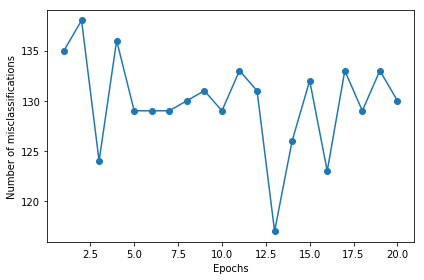

In [283]:
ppn = Perceptron(eta=0.1, n_iter=20)
ppn.fit(X.astype(float), y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.tight_layout()
plt.show()

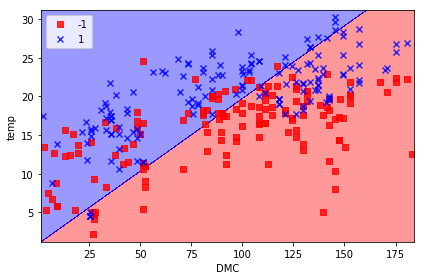

In [289]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)



plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('DMC')
plt.ylabel('temp')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()
